In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('banking.csv')

In [3]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
print('Shape of our DF', df.shape)
print('Null Values present',df.isnull().sum().sum() )

Shape of our DF (41188, 21)
Null Values present 0


No Null values available

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [6]:
df.loc[df.y == 1]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
8,36,admin.,married,university.degree,no,no,no,cellular,jun,mon,...,1,3,1,success,-2.9,92.963,-40.8,1.266,5076.2,1
12,55,management,married,university.degree,no,no,no,cellular,aug,mon,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,1
16,35,services,married,high.school,no,no,no,cellular,apr,thu,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41125,40,admin.,married,university.degree,no,no,no,cellular,may,mon,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.354,5099.1,1
41129,55,blue-collar,married,basic.4y,unknown,yes,no,telephone,jun,fri,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,1
41130,28,self-employed,married,basic.9y,no,yes,no,cellular,may,fri,...,5,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,1
41172,27,blue-collar,single,basic.9y,unknown,yes,no,cellular,jul,wed,...,4,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,1


In [7]:
subscribers = len(df.loc[df.y ==1])/len(df)*100
print("Percentage of the people who subscribed Term Deposit is {}".format(subscribers))
print("Percentage of the people who did not subscribed Term Deposit is {}".format(100-subscribers))

Percentage of the people who subscribed Term Deposit is 11.265417111780131
Percentage of the people who did not subscribed Term Deposit is 88.73458288821988


We see that our classes highly imbalanced, The ratio is almost 89:11 . So, this wont be a good idea to implement the classification model with this imbalance. Hence we will take care of this and deal witht his while training our model.

In [8]:
cat_cols = df.loc[:,df.dtypes == 'object'].columns
num_cols = df.loc[:,df.dtypes != 'object'].columns

In [9]:
print("Categorical Columns are : {} \n".format(list(cat_cols)))
print("Numerical Columns are : {}".format(list(num_cols)))

Categorical Columns are : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'] 

Numerical Columns are : ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [10]:
print(df.loc[:,df.dtypes == 'object'].apply(lambda col: len(col.unique())))

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
dtype: int64


In [11]:
for clnm in cat_cols:
    print("The unique categories in column {} are {}".format(clnm,  df[clnm].unique()))

The unique categories in column job are ['blue-collar' 'technician' 'management' 'services' 'retired' 'admin.'
 'housemaid' 'unemployed' 'entrepreneur' 'self-employed' 'unknown'
 'student']
The unique categories in column marital are ['married' 'single' 'divorced' 'unknown']
The unique categories in column education are ['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']
The unique categories in column default are ['unknown' 'no' 'yes']
The unique categories in column housing are ['yes' 'no' 'unknown']
The unique categories in column loan are ['no' 'yes' 'unknown']
The unique categories in column contact are ['cellular' 'telephone']
The unique categories in column month are ['aug' 'nov' 'jun' 'apr' 'jul' 'may' 'oct' 'mar' 'sep' 'dec']
The unique categories in column day_of_week are ['thu' 'fri' 'tue' 'mon' 'wed']
The unique categories in column poutcome are ['nonexistent' 'success' 'failure']


Here we observe that in Education column, we are given 3 types of basic education, lets combine them and put as 'Basic'.

In [12]:
df['education'] = np.where(df['education'] == 'basic.4y', 'Basic', df['education'])
df['education'] = np.where(df['education'] == 'basic.9y', 'Basic', df['education'])
df['education'] = np.where(df['education'] == 'basic.6y', 'Basic', df['education'])

In [13]:
df['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [14]:
#Based on Y column : Subscribed and Not-Subscribed
df.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


Here we observe that
1. Average age of people who subscribed TD is greater than those who did not.
2. The average duration of people who subsribed TD is also greater than those who did not. 
3. The no of contacts made in previous campaign is also high for those, who subscribed for TD. This indicates that follow-up calls really do impact subscriptions.
4. Rest things we dont find any big relation but they might be making some sense, in furhter Exploratory.

In [15]:
#Based on Marital Status

df[df.y==1].groupby('marital').count()['y']

marital
divorced     476
married     2532
single      1620
unknown       12
Name: y, dtype: int64

Text(0, 0.5, 'Proportion of Customers')

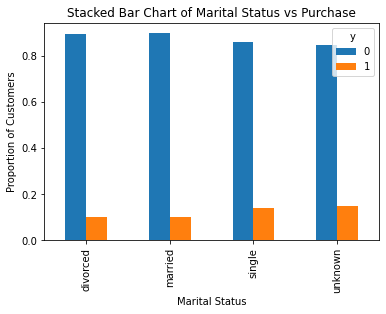

In [16]:
table=pd.crosstab(df.marital,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar')
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

In [17]:
#Based on Education

df[df.y ==1].groupby('education').count()['y']

education
Basic                  1089
high.school            1031
illiterate                4
professional.course     595
university.degree      1670
unknown                 251
Name: y, dtype: int64

Text(0, 0.5, 'Proportion of Customers')

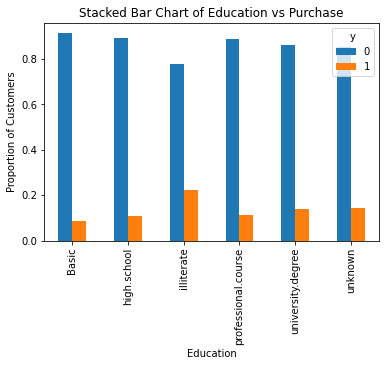

In [18]:
table = pd.crosstab(df.education, df.y)
table.div(table.sum(1).astype('float'), axis =0 ).plot(kind='bar')
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

Here we see that the Education levels do make some sense in prediction of the subscription. So, This is also a good feature.

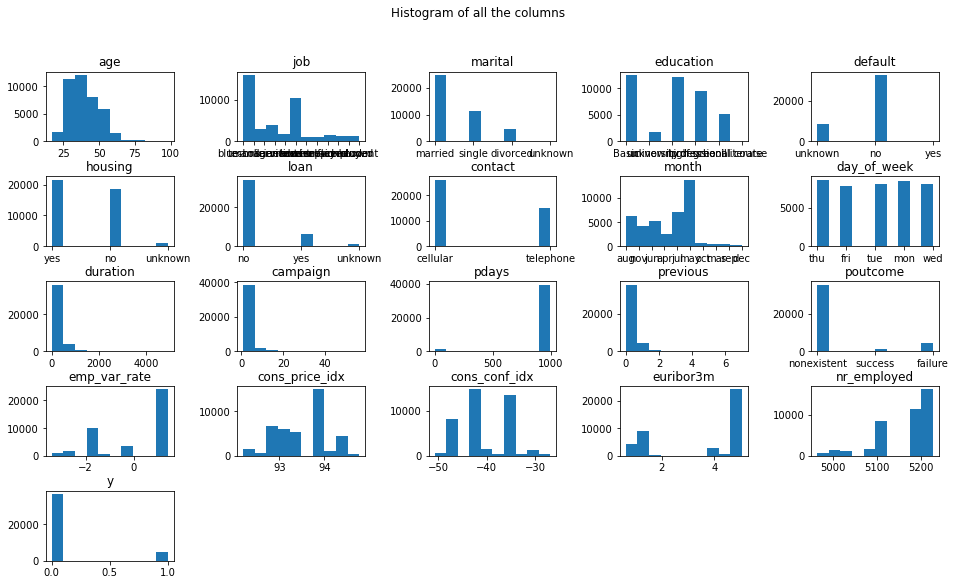

In [19]:
plt.figure(figsize=(16,9))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle('Histogram of all the columns')

for i , clnm in enumerate(df.columns):
    plt.subplot(5,5,i+1)
    plt.hist(df[clnm])
    plt.title(clnm)

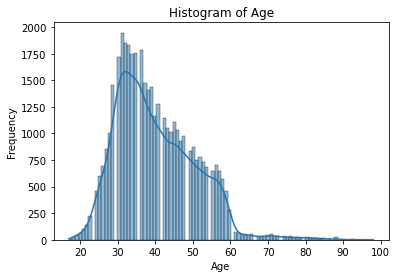

In [20]:
sns.histplot(df.age, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

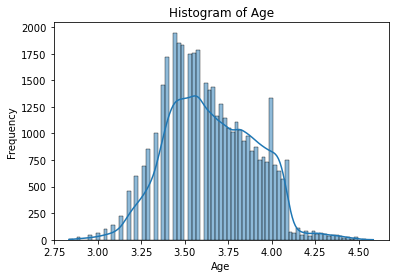

In [21]:
sns.histplot(np.log(df.age), kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

In [78]:
corr = df.corr()
corr.style.background_gradient(cmap='binary')

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp_var_rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons_price_idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons_conf_idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr_employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


With this correlation we can infer that those features having good correlation (~ 90%), we will be dropping them, as they would be making not much sense to train teh model with same data. 

Lets create dummy variables for our categorical data.

In [23]:
dummies = pd.get_dummies(df)
new_df = df.copy()
dummies

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999,0,1.4,94.465,-41.8,4.866,5228.1,...,0,0,0,0,1,0,0,0,1,0
41184,31,196,2,999,0,1.1,93.994,-36.4,4.860,5191.0,...,0,0,0,0,1,0,0,0,1,0
41185,42,62,3,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,1,0,1,0
41186,48,200,2,999,0,-3.4,92.431,-26.9,0.742,5017.5,...,1,0,0,0,0,1,0,0,1,0


In [24]:
new_df = pd.concat([new_df,dummies])
new_df.drop(columns=df.loc[:,df.dtypes == 'object'].columns, inplace=True)   #Removing our all categorical columns, because we already got dummies for them
new_df = new_df.fillna(0)

Now, we are almost done with the EDA , but one thing that we noted initially, is that our classes are imbalanced. 

Now, we have two methods for now to deal with this,

1. To copy the imbalanced class data, and make it equal to the same class.
2. To use SMOTE (Synthetic Minority Oversampling Technique) for oversampling, so that our data is not copied directly but logically it fits to the same class.

SMOTE:
Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.
Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

In [25]:
X = new_df.loc[:, new_df.columns != 'y']
y = new_df.loc[:, new_df.columns == 'y']

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  102276
Number of no subscription in oversampled data 51138
Number of subscription 51138
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [73]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=1000)

classifier.fit(os_data_X, os_data_y)

C:\Users\kp779\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [74]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [75]:
df_pred = pd.DataFrame({'Actual':y_test.values.flatten(), 'Predicted':y_pred})

In [76]:
print("The score of our model is {}".format(classifier.score(X_test, y_test)*100))

The score of our model is 85.89001739974911


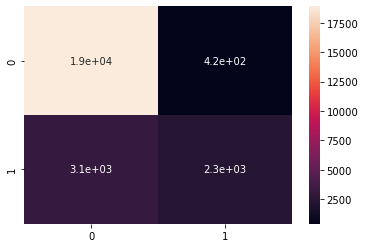

In [77]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_pred, y_test)
sns.heatmap(mat, annot=True)
plt.show()

Now, This model is trained and we got our accuracy around 85%, and that is a good one to start with. However, We can increaset the score more than this by applying some other optimization techniques but for now lets leave it here and move forward with other models to use other techniques as well.